In [57]:
import pandas as pd
from scipy.io import wavfile
import seaborn as sns
import librosa
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm
from processing.processor import ConformerProcessor
import statistics

In [3]:
df = pd.read_csv('./datasets/data.csv')

In [20]:
df.columns

Index(['path', 'text', 'start', 'end', 'type', 'grapheme', 'duration'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102614 entries, 0 to 102613
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   path      102614 non-null  object 
 1   text      102612 non-null  object 
 2   start     102614 non-null  float64
 3   end       102614 non-null  float64
 4   type      299 non-null     object 
 5   grapheme  102612 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.7+ MB


In [6]:
df

,path,text,start,end,type,grapheme
0,/workspace/data/voice_recognition/keyword_dete...,ông viết rất nhiều thể loại trong đó có những ...,0.0,5.460,NaN,Ô NG | V IẾ T | R Ấ T | NH IỀU | TH Ể | L OẠI ...
1,/workspace/data/voice_recognition/keyword_dete...,và số lượng lô đất đấu một lần sẽ lớn hơn năm ...,0.0,3.600,NaN,V À | S Ố | L ƯỢ NG | L Ô | Đ Ấ T | Đ ẤU | M Ộ...
2,/workspace/data/voice_recognition/keyword_dete...,những nhà quản lý giáo dục năng động trách nhi...,0.0,4.584,NaN,NH Ữ NG | NH À | QU Ả N | L Ý | GI ÁO | D Ụ C ...
3,/workspace/data/voice_recognition/keyword_dete...,phạm ngọc thạch nói rằng việt minh muốn khích ...,0.0,8.448,NaN,PH Ạ M | NG Ọ C | TH Ạ CH | N ÓI | R Ằ NG | V ...
4,/workspace/data/voice_recognition/keyword_dete...,điều này khiến bạn cảm thấy bị vùi dập,0.0,2.390,NaN,Đ IỀU | N ÀY | KH IẾ N | B Ạ N | C Ả M | TH ẤY...
...,...,...,...,...,...,...
102609,/workspace/datasets/storage/4432.wav,các khoản lương mà em kiếm được nó cao hơn mặt...,0.0,4.416,NaN,C Á C | KH ỎA N | L ƯƠ NG | M À | E M | K IẾ M...
102610,/workspace/datasets/storage/4434.wav,mặc dù em rất là thích cái việc tương tác và đ...,0.0,2.688,NaN,M Ặ C | D Ù | E M | R Ấ T | L À | TH Í CH | C ...
102611,/workspace/datasets/storage/4435.wav,ờ có một cuộc sống ổn định như thế nhưng mà sa...,0.0,3.648,NaN,Ờ | C Ó | M Ộ T | C UỘ C | S Ố NG | Ổ N | Đ Ị ...
102612,/workspace/datasets/storage/4547.wav,quả thực có rất nhiều lý do mỗi người đều có n...,0.0,4.608,NaN,QU Ả | TH Ự C | C Ó | R Ấ T | NH IỀU | L Ý | D...


## Audio

In [8]:
df['duration'] = df.apply(lambda row: row['end'] - row['start'], axis=1)

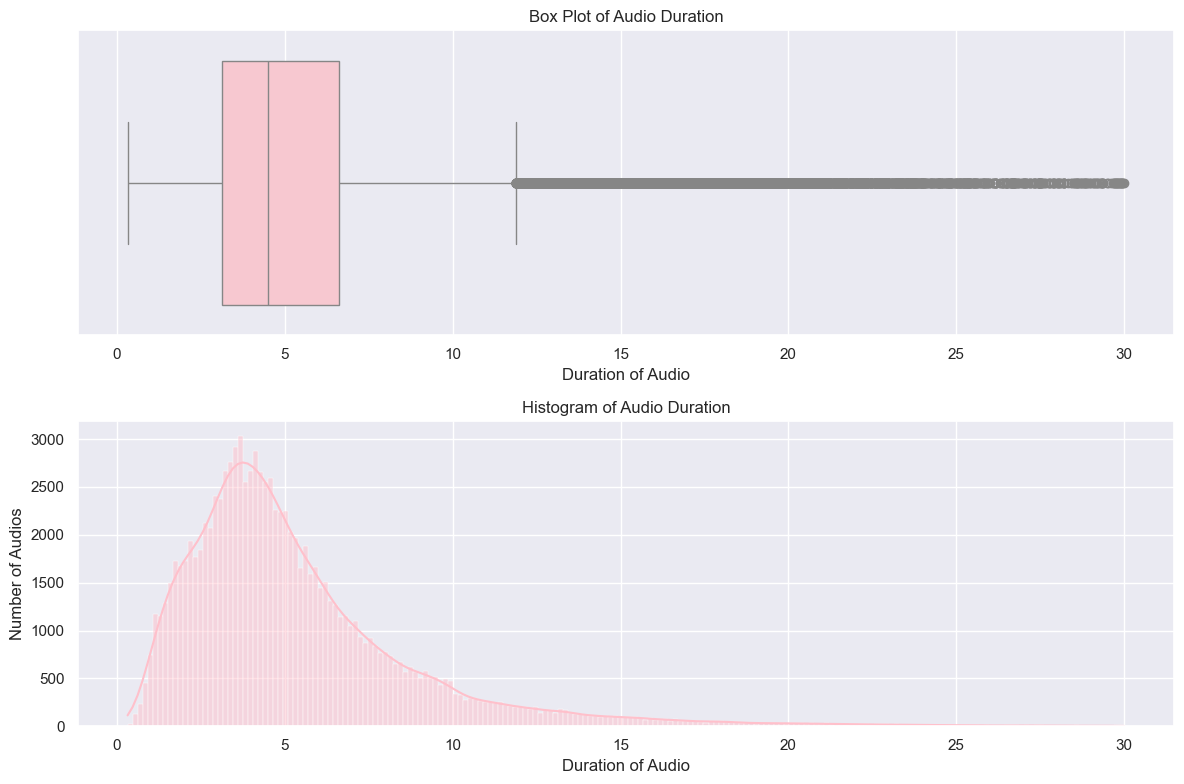

In [25]:
fig, ax = plt.subplots(2, figsize=(12,8))

sns.set_theme(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['duration'], ax = ax[0], color='pink')
ax[0].set_title("Box Plot of Audio Duration")
ax[0].set_xlabel("Duration of Audio")
sns.histplot(x=df['duration'], kde = True, ax = ax[1], color='pink')
ax[1].set_title("Histogram of Audio Duration")
ax[1].set_xlabel("Duration of Audio")
ax[1].set_ylabel("Number of Audios")
fig.tight_layout()

In [26]:
df['duration'].nlargest(10)

20048     30.000
100982    29.952
85375     29.950
3433      29.940
33562     29.910
34399     29.900
9987      29.890
22548     29.860
84659     29.840
19416     29.810
Name: duration, dtype: float64

In [27]:
df['duration'].nsmallest(10)

39867     0.320
54660     0.330
63073     0.330
60419     0.340
94575     0.360
100631    0.384
100653    0.384
101631    0.384
101644    0.384
101649    0.384
Name: duration, dtype: float64

## Text

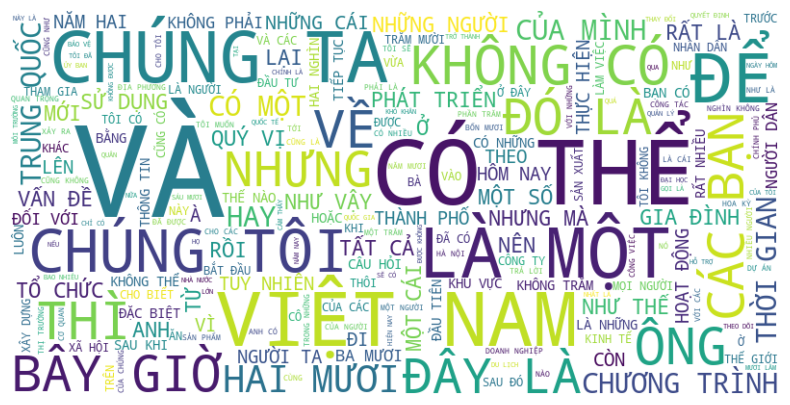

In [32]:
transcripts = df['text'].to_list()
sentence = ""
for transcript in tqdm(transcripts, leave=False):
    sentence += str(transcript).upper() + " "
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentence)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

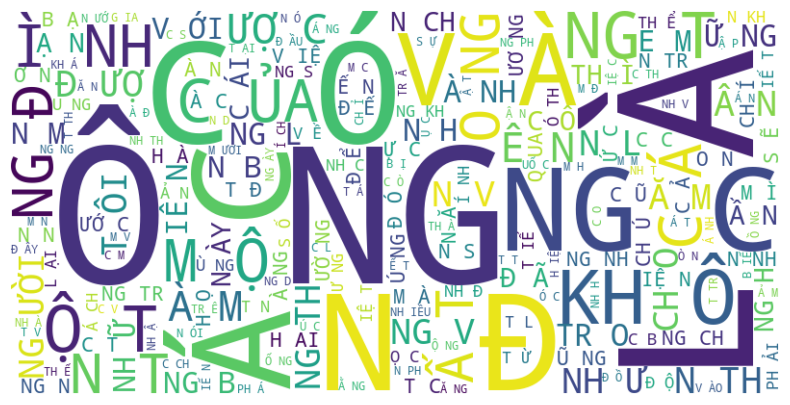

In [34]:
transcript_graphemes = df['grapheme'].to_list()
sentence = ""
for transcript in tqdm(transcript_graphemes, leave=False):
    sentence += str(transcript).replace("| ", "") + " "
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentence)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

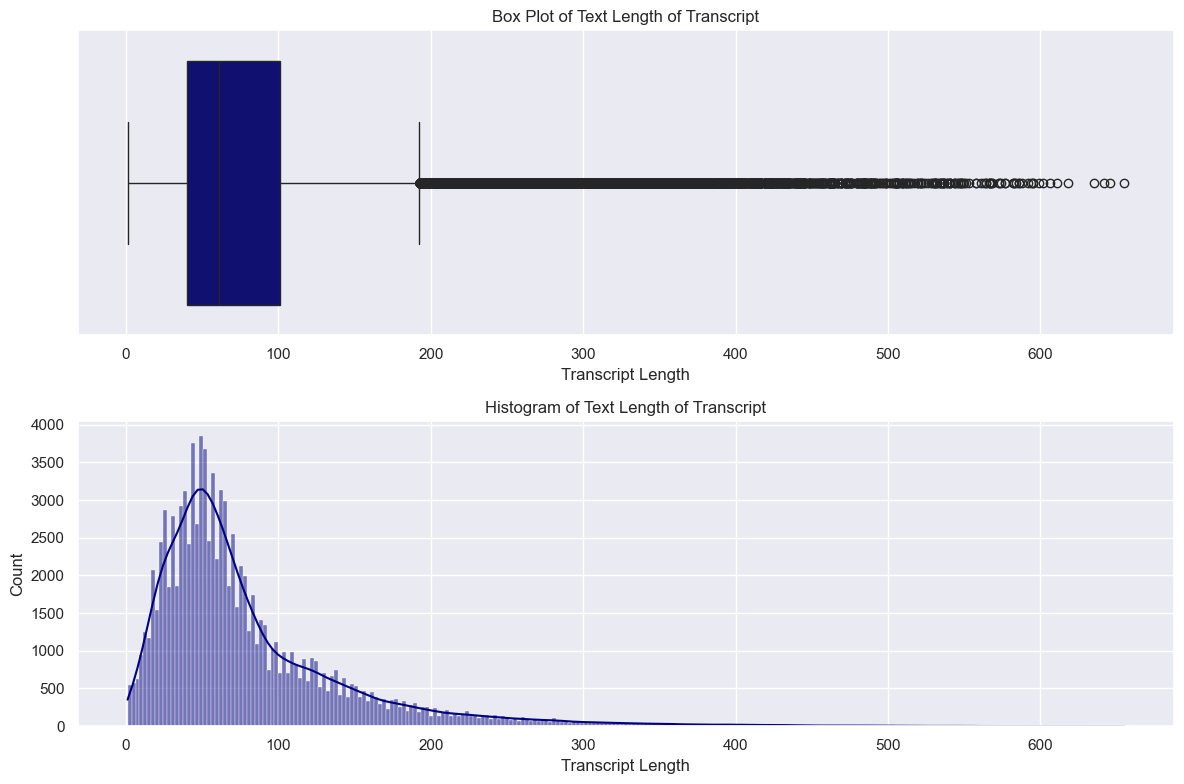

In [36]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

fig, ax = plt.subplots(2, figsize=(12, 8))

sns.set_theme()
sns.boxplot(x=df['text_length'], ax=ax[0], color='navy')
ax[0].set_title("Box Plot of Text Length of Transcript")
ax[0].set_xlabel("Transcript Length")

sns.histplot(x=df['text_length'], ax=ax[1], color='navy', kde=True)
ax[1].set_title("Histogram of Text Length of Transcript")
ax[1].set_xlabel("Transcript Length")

plt.tight_layout()
plt.show()

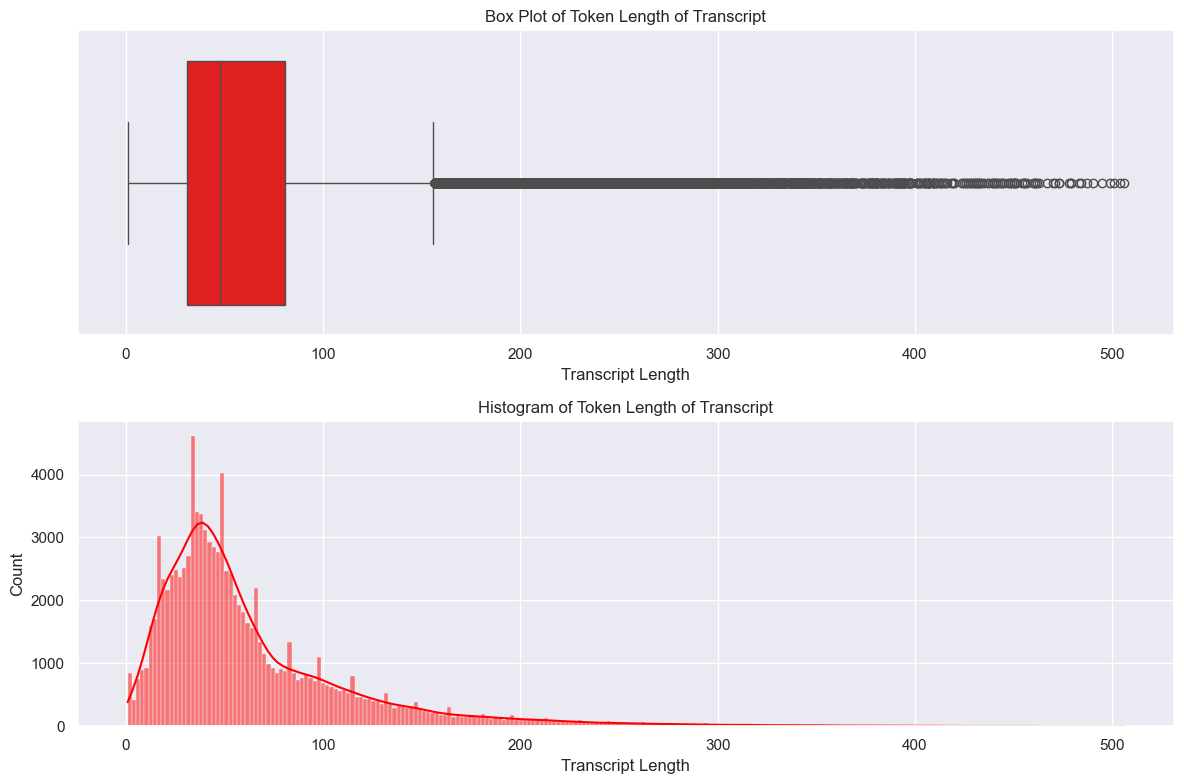

In [38]:
df['token_length'] = df['grapheme'].apply(lambda x: len(str(x).split(" ")))

fig, ax = plt.subplots(2, figsize=(12, 8))

sns.set_theme()
sns.boxplot(x=df['token_length'], ax=ax[0], color='red')
ax[0].set_title("Box Plot of Token Length of Transcript")
ax[0].set_xlabel("Transcript Length")

sns.histplot(x=df['token_length'], ax=ax[1], color='red', kde=True)
ax[1].set_title("Histogram of Token Length of Transcript")
ax[1].set_xlabel("Transcript Length")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Frequencies of Grapheme')

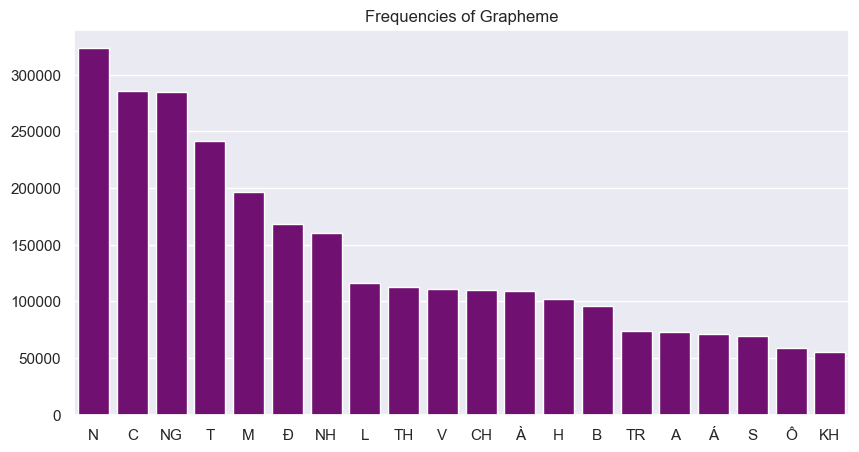

In [55]:
grapheme_freq_dict = dict()
processor = ConformerProcessor(tokenizer_path='./tokenizer/vietnamese.json')

for i in range(1, len(processor.vocab) - 2):
    grapheme_freq_dict[processor.vocab[i]] = 0

grapheme_transcripts = df['grapheme'].to_list()
for graphemes in tqdm(grapheme_transcripts, leave=False):
    sub_graphemes = str(graphemes).split(" ")
    if len(sub_graphemes) == 0:
        continue
    for grapheme in sub_graphemes:
        if grapheme == "|":
            continue
        if grapheme in grapheme_freq_dict:
            grapheme_freq_dict[grapheme] += 1
grapheme_freq_dict = dict(sorted(grapheme_freq_dict.items(), key=lambda item: item[1], reverse=True))

keys = list(grapheme_freq_dict.keys())
values = list(grapheme_freq_dict.values())

fig, ax = plt.subplots(1, figsize=(10, 5))

num_samples = 20

sns.barplot(x=keys[:num_samples], y=values[:num_samples], color='purple', ax=ax)
ax.set_title("Frequencies of Grapheme")

In [59]:
mean_freq = int(statistics.mean(list(grapheme_freq_dict.values())))
print(f"Mean of Frequency of Grapheme: {mean_freq}")

Mean of Frequency of Grapheme: 13012


Number of Graphemes appearing: 326/367
Number of Graphemes not appearing: 41/367


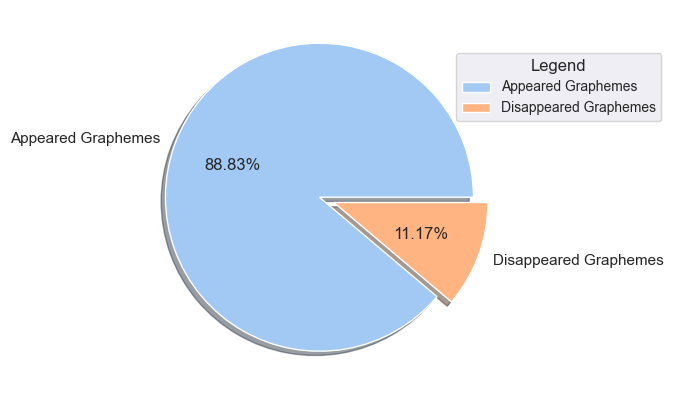

In [84]:
num_non_freq = 0
for grapheme in grapheme_freq_dict:
    if grapheme_freq_dict[grapheme] == 0:
        num_non_freq += 1
num_have_freq = len(grapheme_freq_dict) - num_non_freq

colors = sns.color_palette('pastel')[0:5]

fig, ax = plt.subplots(figsize=(5,5))

print(f"Number of Graphemes appearing: {num_have_freq}/{len(grapheme_freq_dict)}")
print(f"Number of Graphemes not appearing: {num_non_freq}/{len(grapheme_freq_dict)}")

labels = ["Appeared Graphemes", "Disappeared Graphemes"]
explode = (0.1, 0)

ax.pie(x=[num_have_freq, num_non_freq], labels=labels, explode=explode, shadow=True, autopct='%.02f%%', colors=colors)
ax.legend(labels, title='Legend', loc='center left', fontsize=10, bbox_to_anchor=(0.8, 0.3, 0.2, 1))
plt.show()